In [1]:
import cv2
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import more_itertools as mit
import os

In [2]:
# workstation path for the frame : #/home/durrieu/Tracking_Analysis/Tracktor/TemplateMatch/frame1.jpg
# Windows path
#VideoPath = pathlib.Path('H:\MultiMazeBiS_15_Steel_Wax_Female_Starved_noWater_p6-0_80fps.mp4')
#FPath = pathlib.Path('H:\Frames')

# Workstation path
VideoPath = pathlib.Path('/mnt/labserver/DURRIEU_Matthias/Experimental_data/Optogenetics/Optobot/MultiMazeBiS_15_Steel_Wax/Female_Starved_noWater/221116/102044_s0a0_p6-0/MultiMazeBiS_15_Steel_Wax_Female_Starved_noWater_p6-0_80fps.mp4')

In [3]:
#Trim the black part of the video
startpoint = "00:00:35"  # Start point is the timepoint where the arena is fully opened and static
finishpoint = "00:59:59"  # Finish point is the last timepoint of the video
finishpoint2 = "00:02:00"
TrimmedPath = VideoPath.with_stem(VideoPath.stem + "_Trimmed")
TrimmedPath_smol = VideoPath.with_stem(VideoPath.stem + "_Trimmed_smol")


In [186]:

os.system(  # Ffmpeg +
        "ffmpeg -hide_banner -loglevel error -i "
        + VideoPath.as_posix()
        + " -ss "
        + startpoint
        + " -to "
        + finishpoint
        + " -c copy "
        + TrimmedPath.as_posix()
    )

0

Working example from stack overflow for cropping video live (as opposed as brute force numpy reshape like before)

In [38]:
os.system(  # Ffmpeg +
        "ffmpeg -hide_banner -loglevel error -i "
        + VideoPath.as_posix()
        + " -ss "
        + startpoint
        + " -to "
        + finishpoint2
        + " -c copy "
        + TrimmedPath_smol.as_posix()
    )

0

In [180]:
cap = cv2.VideoCapture(VideoPath.as_posix())

# (x, y, w, h) = cv2.boundingRect(c)
# cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 20)
# roi = frame[y:y+h, x:x+w]

while True:
    ret, frame = cap.read()
    # (height, width) = frame.shape[:2]
    sky = frame[0:100, 0:200]
    cv2.imshow('Video', sky)

    if cv2.waitKey(1) == 27:
        exit(0)

TypeError: 'NoneType' object is not subscriptable

In [27]:
import random

# Opens the Video file
cap= cv2.VideoCapture(VideoPath.as_posix())

i=1
f = 0
while f <= 300:
    # get total number of frames
    totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    randomFrameNumber = random.randint(0, totalFrames)
    # set frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, randomFrameNumber)
    success, image = cap.read()

    if success:

        cv2.imwrite('frame'+str(i)+'.jpg',image)

    f += 1
    i += 1



cap.release()
cv2.destroyAllWindows()



KeyboardInterrupt: 

In [14]:
print(FPath.joinpath('test'+str(45)).as_posix)

<bound method PurePath.as_posix of WindowsPath('H:/Frames/test45')>


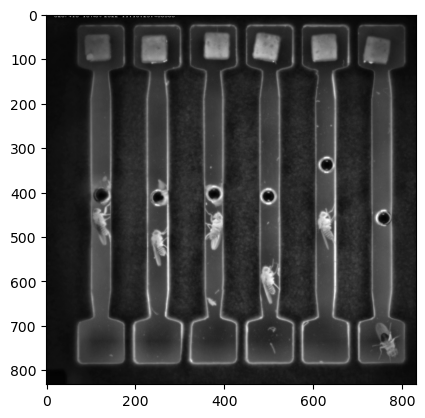

In [21]:
Imtest = cv2.imread('frame1.jpg')
plt.imshow(Imtest)

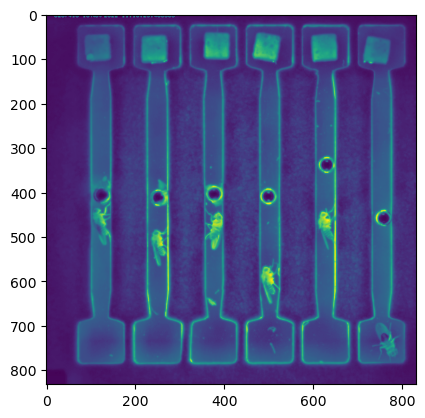

In [20]:
ImGr = cv2.cvtColor(Imtest, cv2.COLOR_BGR2GRAY)
plt.imshow(ImGr)

In [12]:
cols = ImGr.sum(axis=0)

<BarContainer object of 832 artists>

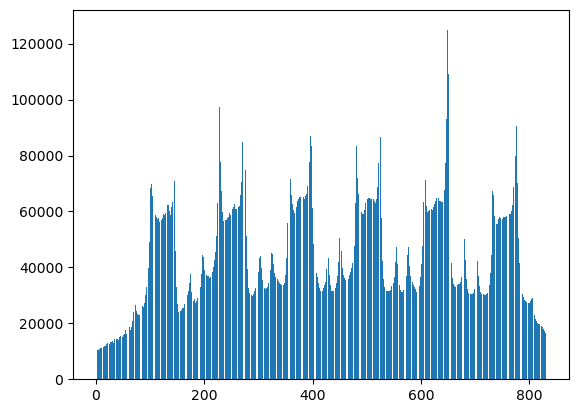

In [15]:
plt.bar(x=range(0,len(cols)), height=cols)

In [24]:
(cols > 50000)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

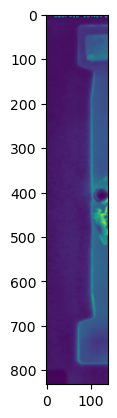

In [25]:
crop1 = ImGr[:,:138]
plt.imshow(crop1)

<BarContainer object of 305 artists>

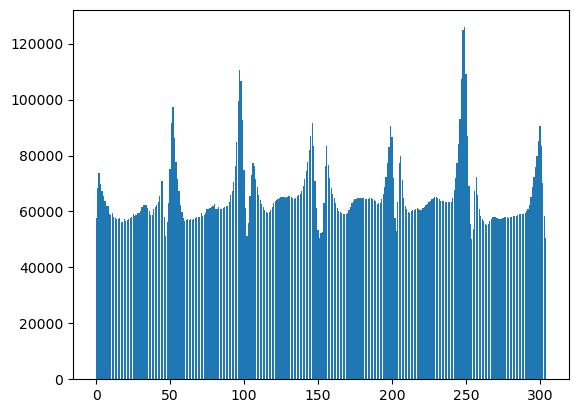

In [31]:
landmarks = cols[cols > 50000]
plt.bar(x=range(0, len(landmarks)), height=landmarks)

In [32]:
crop2 = ImGr[:,cols>50000]

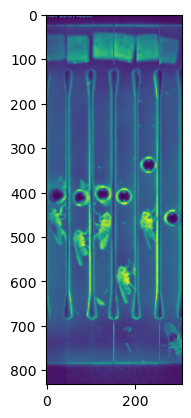

In [33]:
plt.imshow(crop2)

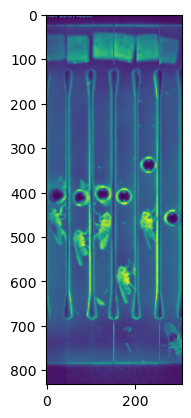

In [57]:
crop3 = ImGr[:,cols>50000]
plt.imshow(crop3)

In [36]:
edges = cols[cols>70000]

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (832,) and arg 1 with shape (305,).

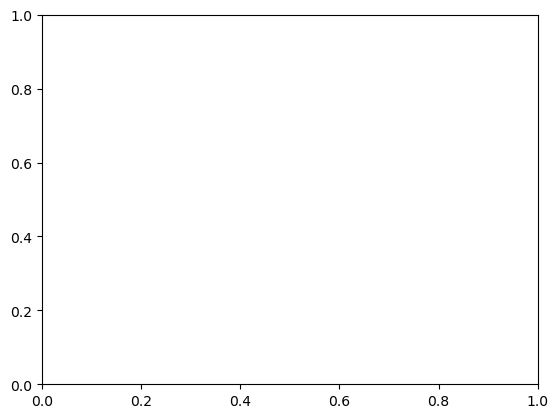

In [37]:
plt.bar(x=range(0, len(cols)), height=landmarks)

In [50]:
cols.indices

AttributeError: 'numpy.ndarray' object has no attribute 'indices'

In [47]:
sns.barplot(x=[0:len(cols)] , y=cols)


SyntaxError: invalid syntax (1797460536.py, line 1)

<AxesSubplot:>

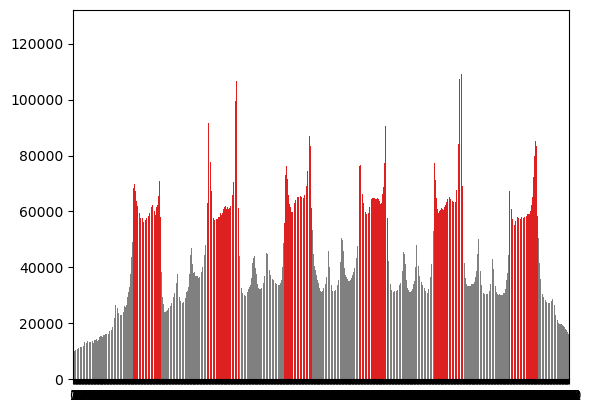

In [56]:
thresh = 55000
clrs = ['grey' if (x<thresh) else 'red' for x in cols]
sns.barplot(x=list(range(0, len(cols))), y=cols, palette=clrs)

In [81]:
arenazones = np.where(cols>55000)
arenazones = arenazones[0].tolist()


In [ ]:
def checkConsecutive(l):
    n = len(1) = 1


In [82]:
ArenaList = []
for zones in mit.consecutive_groups(arenazones):
    ArenaList.append(list(zones))

ArenaList


[[100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146],
 [224,
  225,
  226,
  227,
  228,
  229,
  230,
  231,
  232,
  233,
  234,
  235,
  236,
  237,
  238,
  239,
  240,
  241,
  242,
  243,
  244,
  245,
  246,
  247,
  248,
  249,
  250,
  251,
  252,
  253,
  254,
  255,
  256,
  257,
  258,
  259,
  260,
  261,
  262,
  263,
  264,
  265,
  266,
  267,
  268,
  269,
  270,
  271,
  272,
  273,
  274,
  275,
  276,
  277],
 [354,
  355,
  356,
  357,
  358,
  359,
  360,
  361,
  362,
  363,
  364,
  365,
  366,
  367,
  368,
  369,
  370,
  371,
  372,
  373,
  374,
  375,
  376,
  377,
  378,
  379,
  380,
  381,
  382,
  383,
  384,
  385,
  386,
  387,
  388,
  389,
  390,
  391,
  392,
  393,
  394,
  39

In [69]:
Test = [1,10,11,12,20,30,31,32,33,40]
for group in mit.consecutive_groups(Test):
    print(list(group))

[1]
[10, 11, 12]
[20]
[30, 31, 32, 33]
[40]


In [67]:
print(mit.consecutive_groups(arenazones))

<generator object consecutive_groups at 0x7fa7dc87d230>


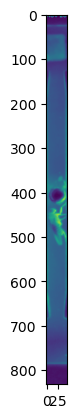

In [86]:
croptest = ImGr[:,ArenaList[0]]
plt.imshow(croptest)

In [84]:
ArenaList[0]

[100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146]

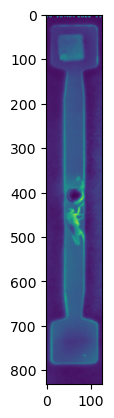

In [101]:
croptest_ext = ImGr[:,60:186] #35
plt.imshow(croptest_ext)

In [97]:
ArenaList[0][-1]

146

In [94]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [102]:
ExtArena1 = list(range(ArenaList[0][0]-40, ArenaList[0][-1]+40))

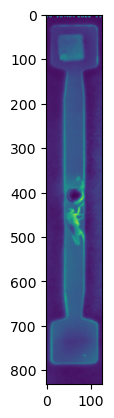

In [103]:
#ImGr[:,65:181] #35
plt.imshow(ImGr[:,ExtArena1])

In [4]:
def ExtList(thelist, tails):
    Extlist = list(range(thelist[0]-tails,thelist[-1]+tails))
    return(Extlist)

In [107]:
ExtArena1_alt = ExtList(ArenaList[0], 40)

In [120]:
Cropped_Arenas = {}

In [122]:
for n in range(len(ArenaList)):
    Cropped_Arenas['Arena{0}'.format(n+1)]= ExtList(ArenaList[n], 40)

Cropped_Arenas

{'Arena1': [60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  182,
  183,
  184,
  185],
 'Arena2': [184,
  185,
  186,
  187,
  188,
  189,
  190,
  191,
  192,
  193,
  194,
  195,
  196,
  197,
  198,
  199,
  200,
  201,
  202,
  20

In [132]:
Cropped_Arenas.values()

dict_values([[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185], [184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,

(2, 3)


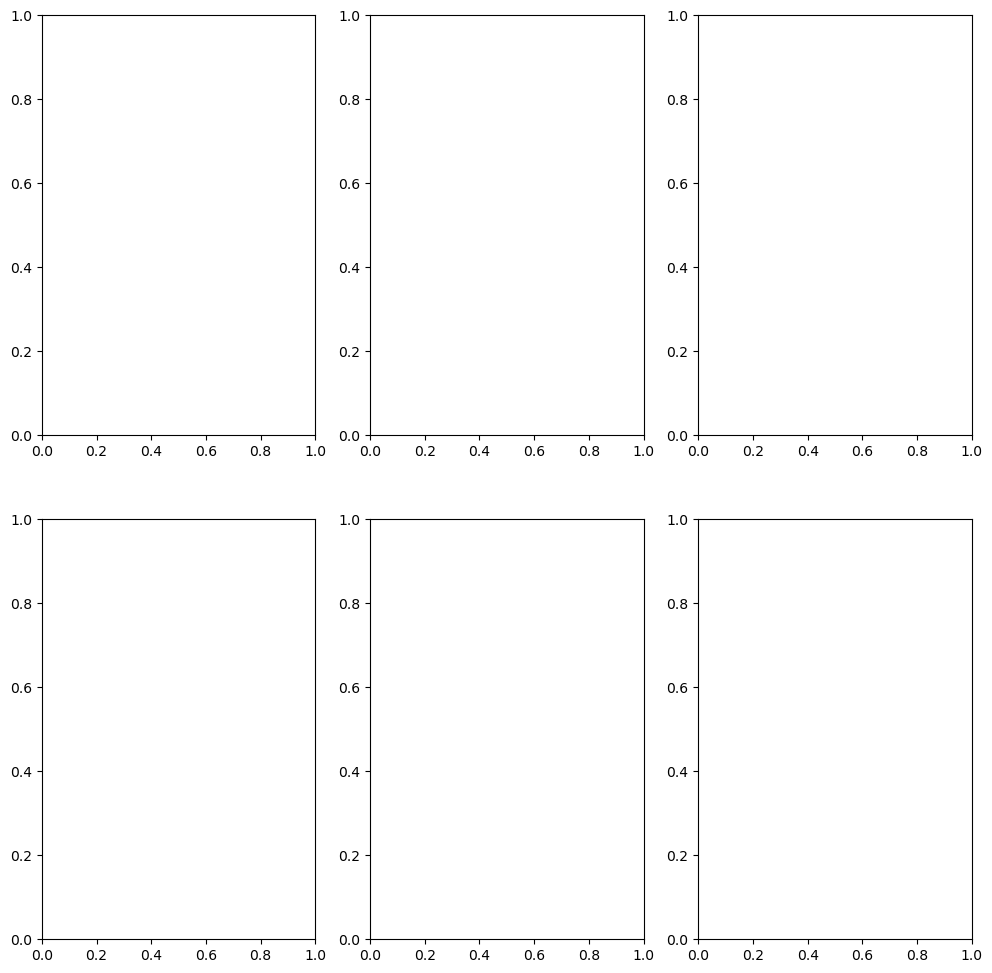

In [147]:
fig, axs =plt.subplots(nrows=2,ncols=3, figsize=[12,12])
print(axs.shape)

TypeError: Axes.imshow() got multiple values for argument 'ax'

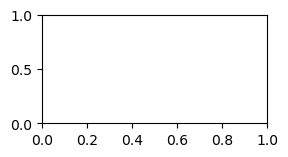

In [150]:

for values in (Cropped_Arenas.values()):
    #f.add_subplot()
    ax = plt.subplot(3,2,n+1)
    plt.imshow(ImGr[:,values], ax=ax)

plt.show()

In [111]:
range(1,6)

range(1, 6)

In [151]:
'Arena'+str(1) == 'okidoki'

False

In [152]:
#Next step : Finding out how to iteratively name my variables with number of arena

In [153]:
# Second method would be to avoid dict as I don't really care about arenas numbers, I already know it from their position in the ArenaList.


In [158]:
Cropped_Arenas = []

for n in range(len(ArenaList)):
    Cropped_Arenas.append(ExtList(ArenaList[n], 40))

Cropped_Arenas

[[60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  182,
  183,
  184,
  185],
 [184,
  185,
  186,
  187,
  188,
  189,
  190,
  191,
  192,
  193,
  194,
  195,
  196,
  197,
  198,
  199,
  200,
  201,
  202,
  203,
  204,
  205,
  2

In [156]:
ArenaList[0]

[100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146]

IndexError: index 3 is out of bounds for axis 1 with size 3

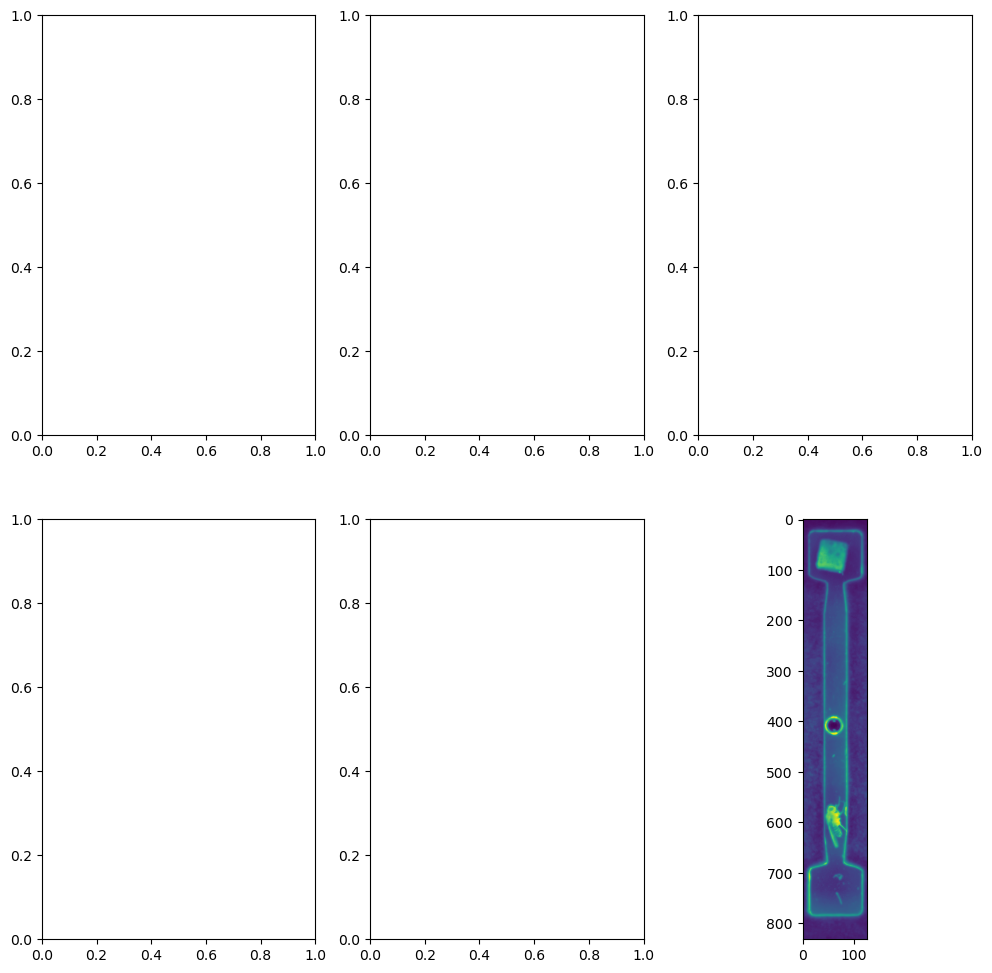

In [166]:
fig, axs =plt.subplots(nrows=2,ncols=3, figsize=[12,12])

for n, img_name in enumerate(Cropped_Arenas):
    #f.add_subplot()
    img = ImGr[:,Cropped_Arenas[n]]
    axs[n//4,n%4]=plt.imshow(img)

plt.show()

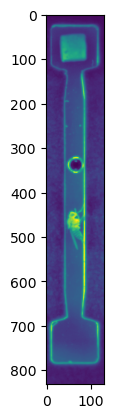

In [176]:
plt.imshow(ImGr[:,Cropped_Arenas[4]])

In [9]:
VideoPath.parent.joinpath("1stFrame.jpg")

PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/Optogenetics/Optobot/MultiMazeBiS_15_Steel_Wax/Female_Starved_noWater/221116/102044_s0a0_p6-0/Monsieur')

In [4]:
cap = cv2.VideoCapture(TrimmedPath_smol.as_posix())

# (x, y, w, h) = cv2.boundingRect(c)
# cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 20)
# roi = frame[y:y+h, x:x+w]

In [13]:

success, image = cap.read()
count=0
while count<1:
    cv2.imwrite(VideoPath.parent.joinpath("1stFrame.jpg").as_posix(), image)
    success,image = cap.read()
    print('Read a new frame: ', success)
    count += 1


Read a new frame:  True


In [6]:
Frame1 = cv2.imread(VideoPath.parent.joinpath("1stFrame.jpg").as_posix())

ImGr = cv2.cvtColor(Frame1, cv2.COLOR_BGR2GRAY) # convert to grayscale
# (height, width) = frame.shape[:2]
cols = ImGr.sum(axis=0) # Compute sum of gray values of each image column
arenazones = np.where(cols>49000) # locate arenas from highest intensity columns
arenazones = arenazones[0].tolist() # Reformat arenazones to list.

ArenaList = [] #Split the list in 6 arenas according to consecutive values
for zones in mit.consecutive_groups(arenazones):
    ArenaList.append(list(zones))

Cropped_Arenas = []

for n in range(len(ArenaList)):
    Cropped_Arenas.append(ExtList(ArenaList[n], 40)) #add margins to fully capture arenas

In [7]:
Cropped_Arenas.remove(Cropped_Arenas[3])

In [8]:
len(Cropped_Arenas[0])

128

In [17]:
for n in range(1,7):
    os.mkdir(VideoPath.parent.joinpath("Arena"+str(n)))

In [20]:
cap = cv2.VideoCapture(TrimmedPath_smol.as_posix())

#Writer parameters
codec = "mp4v"
fourcc = cv2.VideoWriter_fourcc(*codec)
A1 = cv2.VideoWriter(
    filename=VideoPath.parent.joinpath("Small_Arena1/Arena1.mp4").as_posix(),
    fourcc=fourcc,
    fps=80.0,
    frameSize=(len(Cropped_Arenas[0]),int(cap.read()[1].shape[0])),
    isColor=True,
)
A2 = cv2.VideoWriter(
    filename=VideoPath.parent.joinpath("Small_Arena2/Arena2.mp4").as_posix(),
    fourcc=fourcc,
    fps=80.0,
    frameSize=(len(Cropped_Arenas[1]),int(cap.read()[1].shape[0])),
    isColor=True,
)

A3 = cv2.VideoWriter(
    filename=VideoPath.parent.joinpath("Small_Arena3/Arena3.mp4").as_posix(),
    fourcc=fourcc,
    fps=80.0,
    frameSize=(len(Cropped_Arenas[2]),int(cap.read()[1].shape[0])),
    isColor=True,
)

A4 = cv2.VideoWriter(
    filename=VideoPath.parent.joinpath("Small_Arena4/Arena4.mp4").as_posix(),
    fourcc=fourcc,
    fps=80.0,
    frameSize=(len(Cropped_Arenas[3]),int(cap.read()[1].shape[0])),
    isColor=True,
)

A5 = cv2.VideoWriter(
    filename=VideoPath.parent.joinpath("Small_Arena5/Arena5.mp4").as_posix(),
    fourcc=fourcc,
    fps=80.0,
    frameSize=(len(Cropped_Arenas[4]),int(cap.read()[1].shape[0])),
    isColor=True,
)

A6 = cv2.VideoWriter(
    filename=VideoPath.parent.joinpath("Small_Arena6/Arena6.mp4").as_posix(),
    fourcc=fourcc,
    fps=80.0,
    frameSize=(len(Cropped_Arenas[5]),int(cap.read()[1].shape[0])),
    isColor=True,
)

scaling = 1.0

In [21]:

last = 0

while True:
    ret, frame = cap.read() # Grab frame
    this = cap.get(1)
    if ret == True:

        #frame = cv2.resize(frame, None, fx=scaling, fy=scaling,
        #interpolation=cv2.INTER_LINEAR)

        ImGr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # convert to grayscale
        # (height, width) = frame.shape[:2]

        Arena1 = frame[:,Cropped_Arenas[0]]
        Arena2 = frame[:,Cropped_Arenas[1]]
        Arena3 = frame[:,Cropped_Arenas[2]]
        Arena4 = frame[:,Cropped_Arenas[3]]
        Arena5 = frame[:,Cropped_Arenas[4]]
        Arena6 = frame[:,Cropped_Arenas[5]]

        #Display each arena in a dedicated window (here it will be replaced by cv2 video writer in the end
        #cv2.imshow('Arena1', Arena1)
        #cv2.imshow('Arena2', Arena2)
        #cv2.imshow('Arena3', Arena3)
        #cv2.imshow('Arena4', Arena4)
        #cv2.imshow('Arena5', Arena5)
        #cv2.imshow('Arena6', Arena6)

        A1.write(Arena1)
        A2.write(Arena2)
        A3.write(Arena3)
        A4.write(Arena4)
        A5.write(Arena5)
        A6.write(Arena6)

        if cv2.waitKey(1) == 27:
            exit(0)
    if last >= this:
        break
    last = this
cap.release()
A1.release()
A2.release()
A3.release()
A4.release()
A5.release()
A6.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

This first method is not ideal as some arenas are swapped. Maybe just pick one frame in the video?

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'read'
> Overload resolution failed:
>  - image is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'image'
